# PyKrige

**Purpose**

The code supports 2D and 3D ordinary and universal kriging. Standard variogram models (linear, power, spherical, gaussian, exponential) are built in, but custom variogram models can also be used.

Kriged values:
 [[0.4424350231823935 0.46009300267963255 0.48677783416290143
  0.5242839728091153 0.5826773564279761 0.6675723108302911
  0.762051201120422 0.855292554862807 0.9430497678050294
  1.023187939028162 1.0946125446173112]
 [0.44546200237916433 0.4627755254249205 0.4912300081795424
  0.5258400717641025 0.5795484583522891 0.6894396738958455
  0.7980312976452985 0.9006988715149928 0.9951008365617126
  1.079539338162373 1.1530916857324607]
 [0.45676785958175325 0.47570977301136086 0.5152091408727131
  0.5633696804103198 0.6341512271967464 0.7400134608541531
  0.8528837354904478 0.9609834004362502 1.0599441374303662
  1.1471586339367552 1.2213171632630049]
 [0.4874447605759922 0.5115588127198114 0.5588711354322361
  0.6224411173760809 0.7066806640237226 0.8111710290752924
  0.9244416338918081 1.0355366062469609 1.1376089173894661
  1.2263216873410188 1.2994538691743882]
 [0.5328247260596196 0.5619072947779518 0.6120255530693894
  0.6851331952402869 0.7796277309202984 0.8896473382

c:\Users\권헌정\AppData\Local\Programs\Python\Python38\lib\site-packages\pykrige\uk.py:1269: RuntimeWarning: Provided specified drift values, but 'specified' drift was not initialized during instantiation of UniversalKriging class.
  warnings.warn(


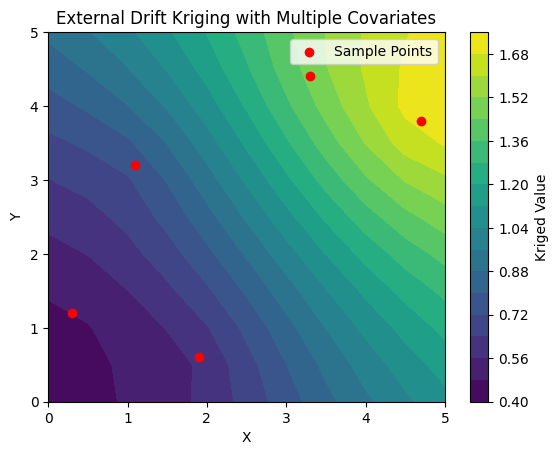

In [5]:
import numpy as np
from pykrige.uk import UniversalKriging

# 1. 샘플 데이터 (X, Y 좌표와 주 변수 값)
data = np.array([
    [0.3, 1.2, 0.47],
    [1.9, 0.6, 0.56],
    [1.1, 3.2, 0.74],
    [3.3, 4.4, 1.47],
    [4.7, 3.8, 1.74]
])

# 2. 공변량 데이터 (공변량 1과 공변량 2)
# 공변량은 보간 대상 영역 전체에서 정의되어야 함
external_drift_1 = np.array([100, 110, 120, 130, 140])  # 공변량 1 (예: 고도)
external_drift_2 = np.array([50, 60, 70, 80, 90])       # 공변량 2 (예: NDVI)

# 보간 대상 그리드 정의
gridx = np.arange(0.0, 5.5, 0.5)
gridy = np.arange(0.0, 5.5, 0.5)

# 보간 대상 그리드에서의 공변량 값
# 여기서는 예제 데이터를 사용했지만 실제로는 보간 대상 영역 전체에 대해 공변량 값을 제공해야 함
grid_drift_1 = np.linspace(100, 140, len(gridx) * len(gridy)).reshape(len(gridx), len(gridy))
grid_drift_2 = np.linspace(50, 90, len(gridx) * len(gridy)).reshape(len(gridx), len(gridy))

# Kriging 객체 생성 (여러 공변량 포함)
UK = UniversalKriging(
    data[:, 0], data[:, 1], data[:, 2],
    variogram_model='linear',
    external_drift=[external_drift_1, external_drift_2]
)

# 보간 수행
z, ss = UK.execute('grid', gridx, gridy, specified_drift_arrays=[grid_drift_1, grid_drift_2])

# 결과 출력
print("Kriged values:\n", z)
print("Variance:\n", ss)

# 시각화 (선택 사항)
import matplotlib.pyplot as plt
plt.contourf(gridx, gridy, z, levels=20, cmap="viridis")
plt.colorbar(label="Kriged Value")
plt.scatter(data[:, 0], data[:, 1], c='red', label="Sample Points")
plt.legend()
plt.title("External Drift Kriging with Multiple Covariates")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()